## Lineare Regression

Zukunfswerte vorhersagen, bzw. Werte welche flexibel sind (nicht binär)

z.B. Temperatur, Einkommen, ...

### Datenset

Das Seoul Bike Data Datenset enthält Wetterdaten und eine Spalte, welche die Anzahl der verliehenen Fahrräder beschreibt

Anhand Linearer Regression soll diese Anzahl mithilfe der Wetterdaten vorhergesagt werden

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
data = pd.read_csv("Data/SeoulBikeData.csv").drop(columns=["Date", "Seasons", "Holiday", "Functioning Day"])
data.rename(columns={"Rented Bike Count": "bike_count", "Temperature(°C)": "temp", "Humidity(%)": "humidity", "Wind speed (m/s)": "wind", "Visibility (10m)": "visibility", "Dew point temperature(°C)": "dew_temp", "Solar Radiation (MJ/m2)": "radiation", "Rainfall(mm)": "rain", "Snowfall (cm)": "snow"}, inplace=True)

In [9]:
data

,bike_count,Hour,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


### Aufteilen des Datensets

In [10]:
# Schritt 1: Datenset in 80/20 aufteilen
# data.sample(frac=1)  # Gibt das Datenset in einer zufälligen Ordnung zurück

sampled = data.sample(frac=1)
training = sampled[:int(len(data)*0.8)]  # 80%
test = sampled[int(len(data)*0.8):]  # 20%

# Schritt 2: class Spalte von den restlichen Daten trennen
left_train = training.drop(columns = ["bike_count"])
right_train = training["bike_count"]

left_test = test.drop(columns = ["bike_count"])
right_test = test["bike_count"]

### SkLearn Modell

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [13]:
reg.fit(left_train, right_train)

LinearRegression()

In [15]:
reg.score(left_train, right_train)  # Gibt die Genauigkeit der Linie an

0.4757267269625838

In [17]:
prediction = reg.predict(left_test)

In [23]:
pd.DataFrame(np.hstack((left_test, right_test.values.reshape(len(prediction), 1), prediction.reshape(len(prediction), 1))), columns=[*range(9), "Actual", "Prediction"])

,0,1,2,3,4,5,6,7,8,Actual,Prediction
0,20.0,23.4,64.0,1.8,1144.0,16.1,0.07,0.0,0.0,2145.0,1278.633973
1,12.0,6.9,30.0,1.8,1994.0,-9.5,0.85,0.0,0.0,709.0,736.111239
2,8.0,8.3,36.0,0.6,1335.0,-5.9,0.82,0.0,0.0,1815.0,615.349552
3,14.0,26.5,43.0,3.9,1671.0,12.8,2.36,0.0,0.0,1148.0,1207.826583
4,17.0,0.4,37.0,5.2,1366.0,-12.6,1.23,0.0,0.0,423.0,601.892591
...,...,...,...,...,...,...,...,...,...,...,...
1747,18.0,24.4,48.0,1.9,1998.0,12.6,0.56,0.0,0.0,3380.0,1353.887975
1748,17.0,16.9,62.0,3.1,1562.0,9.5,0.95,0.0,0.0,1085.0,947.530106
1749,8.0,-3.3,39.0,0.9,1279.0,-15.3,0.02,0.0,0.0,589.0,293.272789
1750,6.0,0.0,33.0,0.4,2000.0,-14.3,0.00,0.0,0.0,165.0,397.117816


In [28]:
right_test.values.reshape(-1)

array([2145,  709, 1815, ...,  589,  165, 1626], dtype=int64)

In [29]:
prediction

array([1278.63397304,  736.11123869,  615.34955213, ...,  293.27278856,
        397.11781632, 1054.3000003 ])

In [45]:
def evaluate(actual, prediction):
    diff = actual / prediction
    diff[diff > 1] **= -1
    return diff * 100

In [46]:
pct = evaluate(right_test.values.reshape(-1), prediction)
pct = pct.reshape(len(pct), 1)

In [64]:
pct

array([[59.60997543],
       [96.31696444],
       [33.90355659],
       ...,
       [49.79164492],
       [41.54938238],
       [64.84009842]])

In [49]:
r = pd.DataFrame(np.hstack((left_test, right_test.values.reshape(len(prediction), 1), prediction.reshape(len(prediction), 1), pct)), columns=[*range(9), "Actual", "Prediction", "Pct"])

In [50]:
r.sort_values("Pct")

,0,1,2,3,4,5,6,7,8,Actual,Prediction,Pct
190,7.0,-2.2,76.0,1.9,527.0,-5.8,0.00,0.0,0.0,404.0,-3.874341,-10427.581067
705,0.0,-0.9,60.0,0.7,1844.0,-7.7,0.00,0.0,0.0,135.0,-3.176103,-4250.491906
245,6.0,1.8,88.0,1.1,313.0,0.0,0.00,0.0,0.3,339.0,-8.716612,-3889.125610
1530,1.0,-1.5,62.0,1.3,2000.0,-7.8,0.00,0.0,0.0,127.0,-4.700722,-2701.712589
268,1.0,4.5,82.0,0.4,350.0,1.6,0.00,0.0,0.0,408.0,-16.307186,-2501.964547
...,...,...,...,...,...,...,...,...,...,...,...,...
413,9.0,27.6,62.0,1.5,1043.0,19.6,1.76,0.0,0.0,985.0,987.921182,99.704310
80,23.0,21.8,49.0,1.6,1965.0,10.6,0.00,0.0,0.0,1440.0,1443.252004,99.774675
1334,8.0,10.4,65.0,0.8,979.0,4.0,0.41,0.0,0.0,489.0,487.963682,99.788074
271,22.0,13.3,71.0,2.1,581.0,8.1,0.00,0.0,0.0,949.0,948.465651,99.943693


In [84]:
def compare(prediction):
    data = pd.DataFrame(np.hstack((left_test, right_test.values.reshape(len(right_test), 1), prediction.reshape(len(prediction), 1))), columns=[*range(9), "Actual", "Prediction"])
    pct = evaluate(right_test.values.reshape(-1), prediction)
    data["Pct"] = pct.reshape(len(pct), 1)
    return data

### Regression mit Neural Net

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [98]:
model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mean_squared_error')

In [99]:
history = model.fit(left_train, right_train, epochs=30, batch_size=8, verbose=1)

Epoch 1/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 416895.2812
Epoch 2/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 292076.4688
Epoch 3/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 248219.4844
Epoch 4/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242333.1562
Epoch 5/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 232494.9688
Epoch 6/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 238362.1250
Epoch 7/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241395.9688
Epoch 8/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 228980.5781
Epoch 9/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 244008.1250
Epoch 10/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 232615.3594
Epoch 11/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 237184.9219
Epoch 12/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 235987.8594
Epoch 13/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 223595.7031
Epoch 14/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

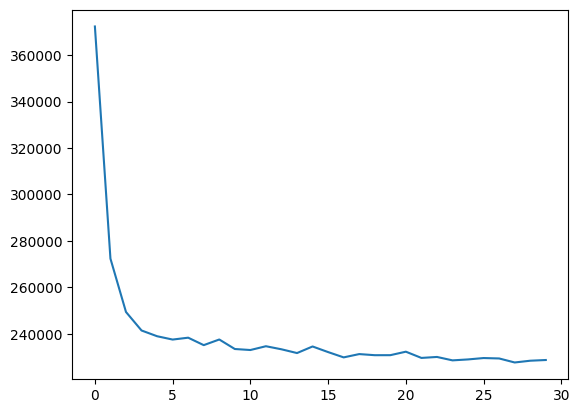

In [100]:
plt.plot(history.history["loss"])

In [101]:
p2 = model.predict(left_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [103]:
reg2 = pd.DataFrame(np.hstack((left_test, right_test.values.reshape(len(right_test), 1), p2.reshape(len(p2), 1), prediction.reshape(len(prediction), 1))), columns=[*range(9), "Actual", "Prediction", "PredictionSkLearn"])

In [106]:
reg2.sort_values("Prediction")

,0,1,2,3,4,5,6,7,8,Actual,Prediction,PredictionSkLearn
1114,0.0,12.0,96.0,3.1,1185.0,11.3,0.00,18.0,0.0,0.0,-904.899658,-928.029857
270,9.0,0.3,97.0,3.0,34.0,-0.1,0.00,9.1,7.1,24.0,-471.501862,-397.968992
827,18.0,20.6,97.0,0.7,222.0,20.1,0.14,21.5,0.0,596.0,-438.583130,-415.254691
68,1.0,-16.1,42.0,2.2,2000.0,-26.0,0.00,0.0,0.7,68.0,-371.734192,-285.378456
1038,0.0,-15.1,34.0,1.7,2000.0,-27.4,0.00,0.0,0.5,68.0,-347.791138,-228.557711
...,...,...,...,...,...,...,...,...,...,...,...,...
489,19.0,35.2,43.0,0.9,2000.0,20.7,0.42,0.0,0.0,2016.0,1555.410278,1764.973152
935,19.0,35.2,41.0,0.5,2000.0,19.9,0.31,0.0,0.0,2087.0,1561.737183,1784.259845
504,18.0,35.8,35.0,1.3,2000.0,17.9,1.21,0.0,0.0,1141.0,1564.077881,1745.290585
1547,17.0,38.0,36.0,1.3,1989.0,20.3,2.03,0.0,0.0,1184.0,1574.751221,1713.340448
